## Práctica 4 - Optimización No Lineal

## Pablo Clemente Moreno <br> No. Cuenta: 418125805

## Considera la siguiente función :
### $\hspace{7.5cm}$   $f(x) = 100(x_{2} - x_{1}^{2})^{2} + (1 - x_{1})^{2}$

In [1]:
def f(x):
    return 100*(x[1]-x[0]**2)**2 + (1 - x[0])**2

### Grafica la función f en el intervalo: $-5 <= x_{1},x_{2} <= 5$

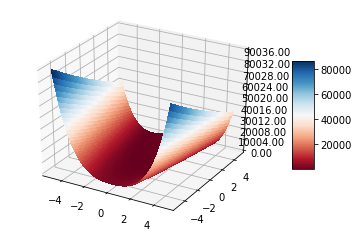

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

x1 = arange(-5.0,5.0,0.1)
x2 = arange(-5.0,5.0,0.1)
X1,X2 = meshgrid(x1, x2) # grid of point
Z = f([X1,X2]) # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Calcula el gradiente de la función f:

Derivar $f(x_1,x_2)$ respecto de $x_1$ y $x_2$<br>
a) $f'(x_1,x_2)$ respecto a $x_1$ = $−400x_{1}(x_{2}−x_{1}^2)−2(1−x1)$<br>
b) $f'(x_1,x_2)$ respecto a $x_2$ = $ 200(x_{2}-x{_1}^{2})$ 

$\nabla f(x1,x2) = \begin{bmatrix}
−400x_{1}(x_{2}−x_{1}^2)−2(1−x_1)\\ 
200(x_{2}-x_{1}^{2})
\end{bmatrix}$

### Calcula la matriz Hessiana de la función f:

Paso 1. Calcular f''(x) respecto de $x_1$ y $x_2$ para a y b <br>

$f''(a)$ respecto a $x_1$ = $1200x_1^2 - 400x_2 + 2 $,  respecto a $x_2$ = $-400x_1$

$f''(b)$ respecto ça $x_1$ = $-400x_1$,  respecto a $x_2$ = $200$

$\nabla^2 f = Hf = \begin{bmatrix}
1200x_1^2 - 400x_2 +2 & -400x_1 \\ 
-400x_1 & 200 
\end{bmatrix}$

## Cauchy

In [3]:
import math
import copy
import numpy as np

In [4]:
num_eval=0
def f(x):
    global num_eval
    num_eval+= 1
    return 100*(x[1]-x[0]**2)**2 + (1 - x[0])**2
num_grad=0
def grad_f(x):
    global num_grad
    num_grad+= 1
    df_x1 = (-400*x[0])*(x[1] - x[0]**2) - 2*(1 -x[0])
    df_x2 = 200*(x[1] - x[0]**2)
    return [df_x1 , df_x2]

In [5]:
def flambda(x, d, l):
    xlambda = []
    xlambda.append(x[0] + l*d[0])
    xlambda.append(x[1] + l*d[1])
    fl = f(xlambda)
    return fl

In [6]:
def fl(x, d, w, a, b):
    l = (b-a)*w + a
    return flambda(x,d,l)

In [7]:
def seccionDorada(x, d, a,b,eps):
    e = eps/(b-a)
    aw = 0
    bw = 1
    lw = 1
    while lw > e:
        w1 = aw +(0.618*lw)
        w2 = bw -(0.618*lw)
        f1 = fl(x, d, w1, a, b) 
        f2 = fl(x, d, w2, a, b) 
        if  f1 < f2:
            aw = w2 
        else:
            bw = w1
        lw = bw - aw   

        lopt = (((b-a)*bw + a)+((b-a)*aw + a))/2.0
    return lopt

In [8]:
def condicion_paro(xk, eps):
    return  True if np.linalg.norm(xk[2]) > eps else False 

def calcular_xn(x, s, n):
    aux = [x[0][i] + s*x[2][i] for i in range(n)] 
    x[0] = aux
    x[1] = f(x[0])
    x[2] = grad_f(x[0])
    return x

def cauchy(x0, eps, n):
    x_k = [x0, f(x0), grad_f(x0)]
    x_k1 = copy.copy(x_k)
    
    while condicion_paro(x_k1, eps):
        s = seccionDorada(x_k1[0], x_k1[2], -5, 5, 0.0001) 
        x_k, x_k1 = copy.copy(x_k1), calcular_xn(x_k1, s, n)

    print('x = [%.3f,%.3f]'%(x_k1[0][0],x_k1[0][1]))
    print('f(x) = %.3f'%(x_k1[1]))
    print(num_eval)
    print(num_grad)

In [9]:
n = 2
x0 = [-1.2,1.0]
eps = 0.001
cauchy(x0, eps, n)

x = [1.001,1.002]
f(x) = 0.000
176205
3597


## Newton

In [10]:
num_eval=0
def f(x):
    global num_eval
    num_eval+= 1
    return 100*(x[1]-x[0]**2)**2 + (1 - x[0])**2

num_grad=0
def grad_f(x):
    global num_grad
    num_grad+= 1
    df_x1 = (-400*x[0])*(x[1] - x[0]**2) - 2*(1 -x[0])
    df_x2 = 200*(x[1] - x[0]**2)
    return np.array([df_x1,df_x2])
num_hess=0
def grad2_f(x):
    global num_hess
    num_hess+= 1
    comp1 = 1200*x[1]**2 -400*x[1] + 2
    comp2 = -400*x[0]
    comp3 = -400*x[0]
    comp4 = 200
    return np.matrix([[comp1,comp2],[comp3,comp4]])

In [11]:
def norm(x):
    return math.sqrt(sum([i**2 for i in x]))

In [12]:
def newton(x0 , eps1: float, eps2: float):
    a, b = -5.0, 5.0
    x_k = x0
    grad_x = grad_f(x0)
    grad2 = grad2_f(x0) #matriz hessiana
    
    while np.linalg.norm(grad_x) > eps1:
        s = seccionDorada(x_k, grad_x, a, b, eps2)
        x_k1 = x_k - (grad_x *(s * np.linalg.inv(grad2)))
        x_k1= x_k1.tolist()[0]
        grad_xk1 = grad_f(x_k1)
        fk = f(x_k)
        fk1 = f(x_k1)
        if abs((fk1-fk)/fk) <= eps1:
            return x_k1
        else:
            x_k = copy.copy(x_k1)
            grad_x = copy.copy(grad_xk1)
            grad2 = grad2_f(x_k1)
        
    return x_k1

In [13]:
x0 = np.array([-1.2,1.0])
eps1 = 0.0001
eps2 = 0.0001
xmin=newton(x0,eps1,eps2)
print('x = [%.3f,%.3f]'%(xmin[0],xmin[1]))
print('f(x) = %.3f'%(f(xmin))) 
print(num_eval)
print(num_grad)
print(num_hess)

x = [-1.199,-40.154]
f(x) = 172995.347
697601
13953
13952


## Marquardt

In [14]:
num_eval=0
def f(x):
    global num_eval
    num_eval+= 1
    return 100*(x[1]-x[0]**2)**2 + (1 - x[0])**2

num_grad=0
def grad_f(x):
    global num_grad
    num_grad+= 1
    df_x1 = (-400*x[0])*(x[1] - x[0]**2) - 2*(1 -x[0])
    df_x2 = 200*(x[1] - x[0]**2)
    return np.array([df_x1,df_x2])

num_hess=0
def grad2_f(x):
    global num_hess
    num_hess+= 1
    comp1 = 1200*x[1]**2 -400*x[1] + 2
    comp2 = -400*x[0]
    comp3 = -400*x[0]
    comp4 = 200
    return np.matrix([[comp1,comp2],[comp3,comp4]])

In [15]:
I = np.identity(2, dtype = float) 

In [16]:
def marquardt(x0, l0, eps, M):
    x_k = x0
    grad_xk = grad_f(x_k)
    x_k1 = copy.copy(x_k)
    grad_xk1 = grad_f(x_k1)
    lk = l0
    k = 0
    
    while np.linalg.norm(grad_xk) > eps and k < M:
        while f(x_k1) >= f(x_k):
            d_k = grad_xk*(np.linalg.inv(grad2_f(x_k) + lk*I)*-1)
            x_k1 = x_k + d_k.tolist()[0]
            
            if f(x_k1) >= f(x_k):
                lk = 2*lk
                break
            x_k = copy.copy(x_k1)
            grad_xk = grad_f(x_k)
        l_k1 = 0.5*lk
        k += 1
    print('x = [%.3f,%.3f]'%(x_k1[0],x_k1[1]))
    print('f(x) = %.3f'%(f(x_k1))) 
    print(num_eval)
    print(num_grad)
    print(num_hess)

In [17]:
n = 2
x0 = np.array([-1.2,1.0])
l0 = 10000
eps = 0.001
M = 1000
marquardt(x0, l0, eps, M)

x = [1.000,1.000]
f(x) = 0.000
2689773
672444
672443


## Fletcher-Reeves

In [18]:
num_eval=0
def f(x):
    global num_eval
    num_eval+= 1
    return 100*(x[1]-x[0]**2)**2 + (1 - x[0])**2

num_grad=0
def grad_f(x):
    global num_grad
    num_grad+= 1
    df_x1 = (-400*x[0])*(x[1] - x[0]**2) - 2*(1 -x[0])
    df_x2 = 200*(x[1] - x[0]**2)
    return np.array([df_x1,df_x2])

def magnitud(x):
    return np.linalg.norm(x)

In [19]:
def fletcher_reeves(x0, eps1, eps2, eps3, n):
    s0 = -1*grad_f(x0)
    l0 = seccionDorada(x0, s0 , -5, 5, eps1)
    x1 = x0 + l0*s0
    k = 1
    x_k = x1
    x_kmenos= x0
    s_menos = s0
    while magnitud(x_k - x_kmenos)/magnitud(x_kmenos) > eps2 and magnitud(grad_f(x_k)) > eps3:
        s_k = -1*grad_f(x_k) + ((magnitud(grad_f(x_k))**2)/(magnitud(grad_f(x_kmenos))**2))*s_menos
        l_k = seccionDorada(x_k, s_k , -5, 5, eps1)
        x_k1 = x_k + l_k*s_k
        k += 1
        s_menos = copy.copy(s_k)
        x_kmenos = copy.copy(x_k)
        x_k = copy.copy(x_k1)
    
    print('x = [%.3f,%.3f]'%(x_k1[0],x_k1[1]))
    print('f(x) = %.3f'%(f(x_k1))) 
    print(num_eval)
    print(num_grad)

In [20]:
n = 2
x0 = np.array([-1.2,1.0])
eps1, eps2, eps3 = 0.0001, 0.0001, 0.0001
fletcher_reeves(x0, eps1, eps2, eps3, n)

x = [1.850,3.427]
f(x) = 0.724
2257
185


Método | Punto optimo | f(x) | Eval_f | Eval_∇ | Eval_H
-- | -- | -- | -- | -- | -- |
Cauchy |[1.001,1.002] | 0.000|176205 |3597 | -
Newton |[-1.199,-40.154]|172995.347| 697601 |13953 |13952 
Marquardt| [1.000,1.000]|0.000| 2689773 | 672444 |672443
Fletcher-Reeves |[1.850,3.427]|0.724| __2257__| __185__ | -

## Discusión

Antes que comenzar, aclaro que el número de evaluaciones de la función objetivo, gradiente, matríz hessiana no son las optimas, porque al momento de hacer las implementaciones, se evaluan cuando se requerie, es decir, pude haber ahorrado evaluciones si las guardaba en varibles, pero no me dio el tiempo suficiente. <br>
Ahora tenemos que los métodos de _Newton_ y _Marquardt_ ademas de calcular el gradiente necesitan de cálculos de la matríz Hessiana por lo que su costo computacional es más alto. <br>
En este caso el que obtuvo menor número de evaluciones(aprox) y no requiere cálculo de la matríz H, es el método de __Fletcher-Reeves__. Sin embargo el valor de la función objetivo en el punto resultante por este método no es igual a 0.0 por lo que podriamos decir que no es un minímo.<br> Los métodos donde la el valor de la función objetivo en el punto resultante es igual a 0.0 son __Cauchy__ y __Marquardt__.
<br>Para verificar que el punto ([1.000,1.000]) es un mimínimo, comprobaremos las condiciones _necesarias_ y _suficientes_

## Condiciones necesarias (gradiente f(x)=0):

### Consideramos el gradiente de f como:

$\nabla f(x1,x2) = \begin{bmatrix}
−400x_{1}(x_{2}−x_{1}^2)−2(1−x_1)\\ 
200(x_{2}-x_{1}^{2})
\end{bmatrix}$

Evaluamos el punto[1.000,1.000]: 

In [22]:
grad_f([1.000,1.000])

array([-0.,  0.])

## Condiciones suficientes (matríz hessiana positivamente definida):

### Consideramos la matríz Hessiana de f como:

$\nabla^2 f = Hf = \begin{bmatrix}
1200x_1^2 - 400x_2 +2 & -400x_1 \\ 
-400x_1 & 200 
\end{bmatrix}$

In [25]:
H = grad2_f([1.000,1.000])
H

matrix([[ 802., -400.],
        [-400.,  200.]])

Verificamos si esta positivamente definida:

In [26]:
np.linalg.det(H)

399.9999999999931

Resultado: 
- El punto $x=[1.000,1.00]$ cumple con la condición necesaria ($\nabla f(x) = 0$) y la matríz hessiana esta positivamente definida (determinante $\neq 0$) por lo tanto __si es un mínimo__.<br>